In [1]:
import pandas as pd

df = pd.read_csv('/content/cell-count.csv')

df.head()

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
0,prj1,sbj000,melanoma,57,M,miraclib,no,sample00000,PBMC,0,10908,24440,20491,13864,23511
1,prj1,sbj000,melanoma,57,M,miraclib,no,sample00001,PBMC,7,6777,19407,33459,18170,23011
2,prj1,sbj000,melanoma,57,M,miraclib,no,sample00002,PBMC,14,9794,22940,24274,17482,18332
3,prj1,sbj001,carcinoma,68,M,miraclib,yes,sample00003,PBMC,0,10081,20271,36157,14041,12610
4,prj1,sbj001,carcinoma,68,M,miraclib,yes,sample00004,PBMC,7,4372,33778,38293,16527,14933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   project                    10500 non-null  object
 1   subject                    10500 non-null  object
 2   condition                  10500 non-null  object
 3   age                        10500 non-null  int64 
 4   sex                        10500 non-null  object
 5   treatment                  10500 non-null  object
 6   response                   9078 non-null   object
 7   sample                     10500 non-null  object
 8   sample_type                10500 non-null  object
 9   time_from_treatment_start  10500 non-null  int64 
 10  b_cell                     10500 non-null  int64 
 11  cd8_t_cell                 10500 non-null  int64 
 12  cd4_t_cell                 10500 non-null  int64 
 13  nk_cell                    10500 non-null  int64 
 14  monocy

In [6]:
print("Missing values:")
print(df.isna().sum())

Missing values:
project                         0
subject                         0
condition                       0
age                             0
sex                             0
treatment                       0
response                     1422
sample                          0
sample_type                     0
time_from_treatment_start       0
b_cell                          0
cd8_t_cell                      0
cd4_t_cell                      0
nk_cell                         0
monocyte                        0
dtype: int64


Missing values for response

In [13]:
df[df['response'].isna()]

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
30,prj1,sbj010,healthy,70,M,none,NaN,sample00030,PBMC,0,6413,25167,20437,22317,19638
31,prj1,sbj010,healthy,70,M,none,NaN,sample00031,PBMC,7,7007,30482,31653,14167,23316
32,prj1,sbj010,healthy,70,M,none,NaN,sample00032,PBMC,14,11118,19704,32582,20603,17350
36,prj1,sbj012,healthy,57,F,none,NaN,sample00036,PBMC,0,8635,29458,31787,16498,17154
37,prj1,sbj012,healthy,57,F,none,NaN,sample00037,PBMC,7,8915,21012,24564,14367,23510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,prj3,sbj3494,healthy,72,F,none,NaN,sample10483,PBMC,7,9520,35588,31239,15499,14427
10484,prj3,sbj3494,healthy,72,F,none,NaN,sample10484,PBMC,14,10958,26628,34107,14038,15671
10497,prj3,sbj3499,healthy,54,M,none,NaN,sample10497,PBMC,0,8646,30656,27328,19274,22154
10498,prj3,sbj3499,healthy,54,M,none,NaN,sample10498,PBMC,7,10199,28842,32158,11271,21695


In [17]:
all(df[df['condition'] == 'healthy'].index == df[df['response'].isna()].index)

True

Missing values for response are because healthy patients aren't treated.

In [7]:
df.describe()

,age,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
count,10500.000000,10500.000000,10500.00000,10500.000000,10500.000000,10500.000000,10500.000000
mean,64.442286,7.000000,9913.63000,24988.237524,30391.576000,14963.554095,20087.776762
std,8.569945,5.715748,3169.03395,4737.457276,5268.629737,3840.911741,4392.141589
min,50.000000,0.000000,1835.00000,11083.000000,12959.000000,4125.000000,6113.000000
25%,57.000000,0.000000,7635.50000,21678.000000,26762.250000,12257.500000,17056.000000
50%,64.000000,7.000000,9598.00000,24718.000000,30132.500000,14697.500000,19783.500000
75%,72.000000,14.000000,11839.00000,27955.000000,33714.500000,17356.250000,22836.250000
max,79.000000,14.000000,27733.00000,47259.000000,57081.000000,32720.000000,41647.000000


In [8]:
df.describe(include=['object', 'category'])

,project,subject,condition,sex,treatment,response,sample,sample_type
count,10500,10500,10500,10500,10500,9078,10500,10500
unique,3,3500,3,2,3,2,10500,2
top,prj1,sbj3499,melanoma,M,miraclib,yes,sample10499,PBMC
freq,4500,3,5175,5430,4695,4611,1,7500


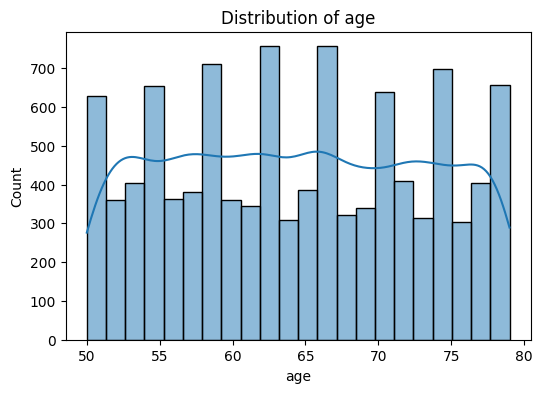

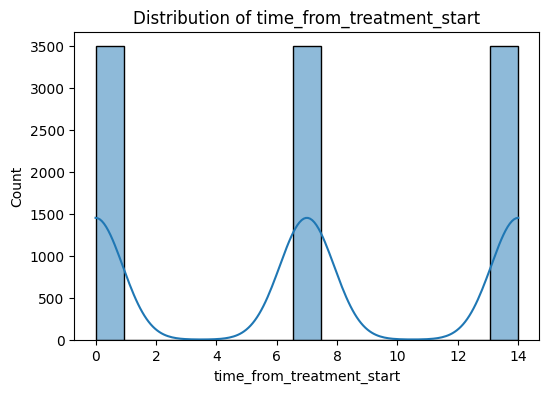

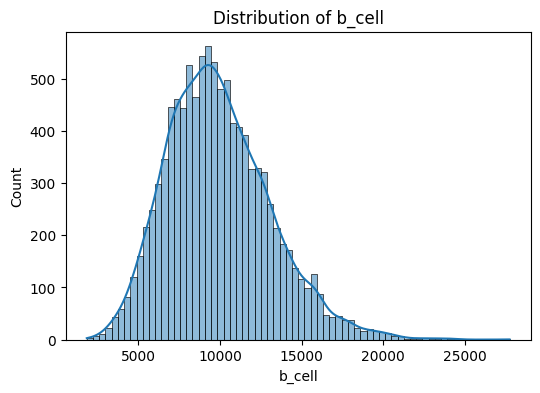

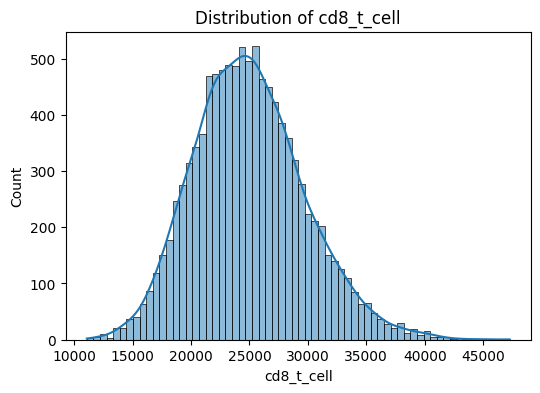

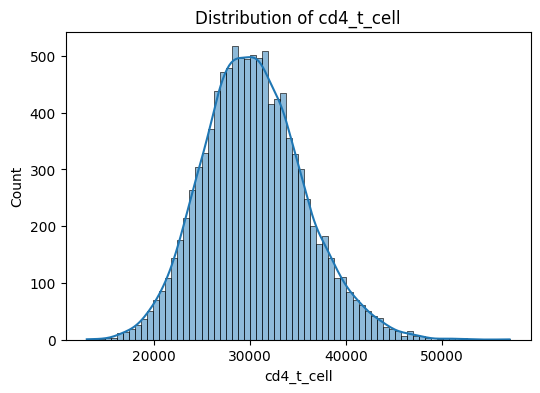

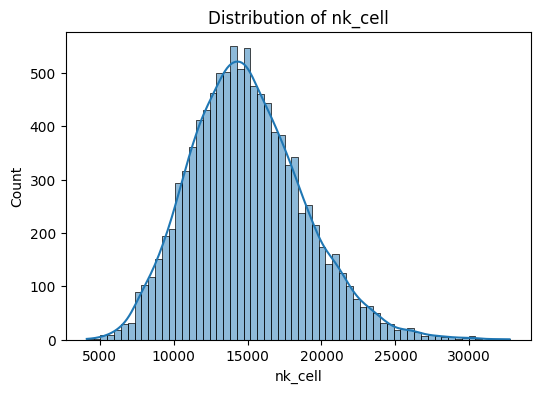

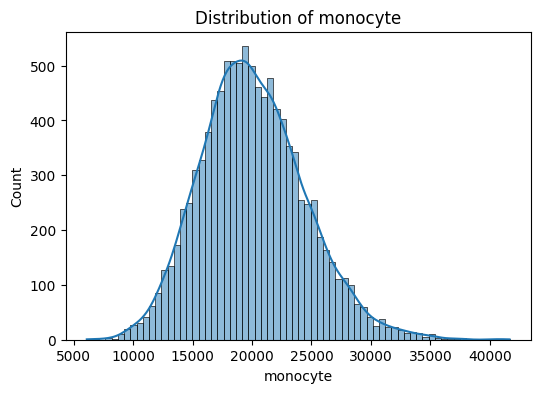

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = ['age', 'time_from_treatment_start', 'b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

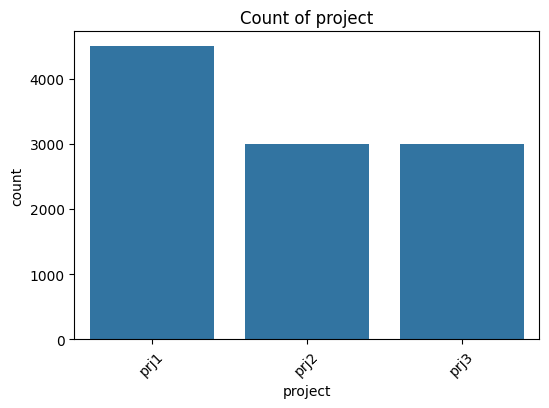

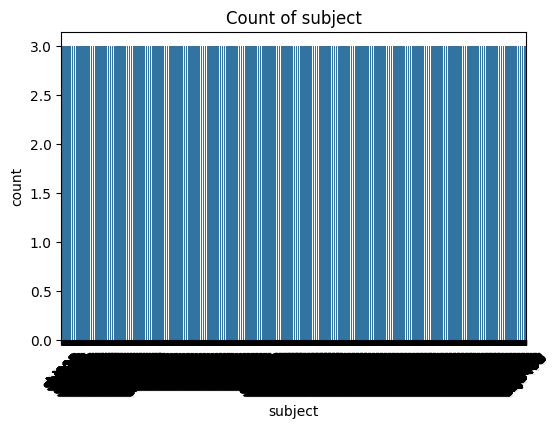

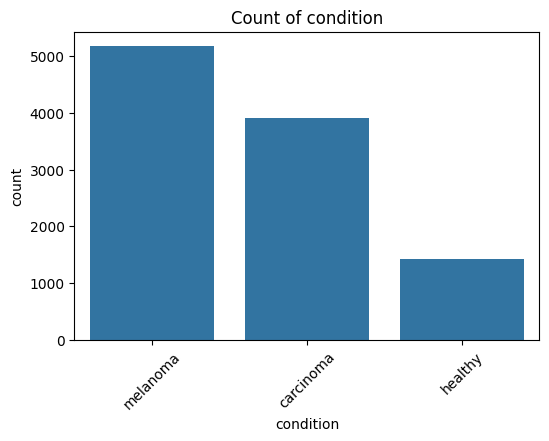

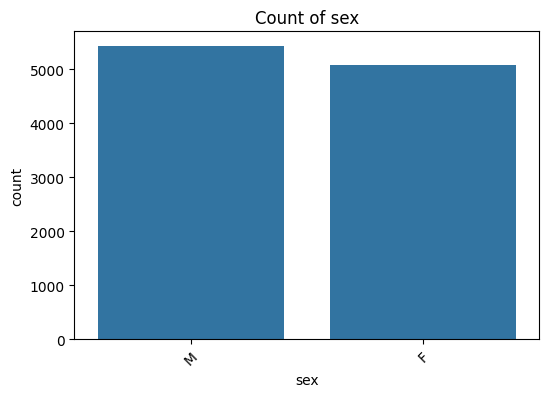

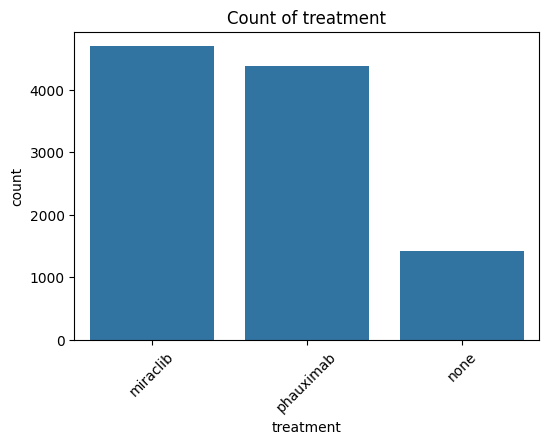

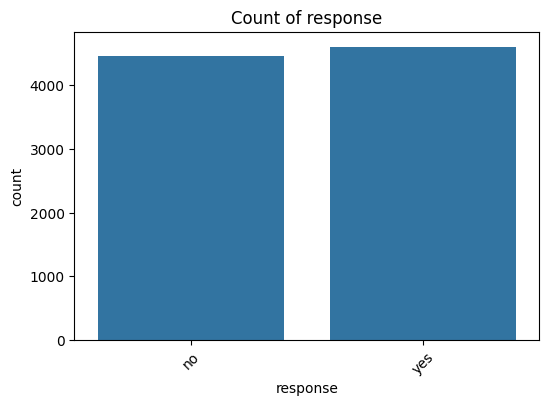

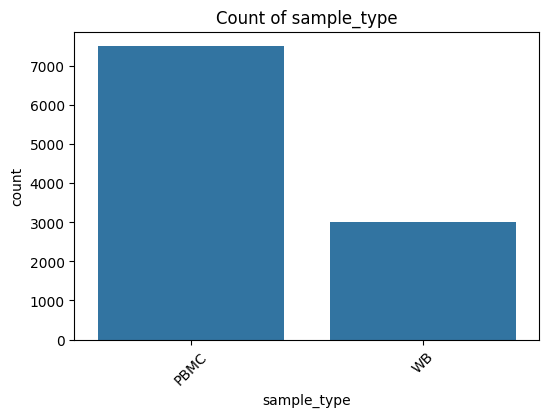

In [10]:
categorical_cols = ['project', 'subject', 'condition', 'sex', 'treatment', 'response', 'sample_type']
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)
        plt.show()